In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('test_dataset.csv')
AQI = data.iloc[:, 10].values # used to be 7


# indexes = [2, 3, 5]
# for index in sorted(indexes, reverse=True):
#     del my_list[index]
print(type(AQI))
print(len(AQI))

AQI = AQI.tolist()

idx_l = []
for i in range(len(AQI)):
    if AQI[i] < 0:
        idx_l.append(i)
        
for index in sorted(idx_l, reverse=True):
    del AQI[index]

print(len(AQI))
AQI = np.array(AQI)

        

<class 'numpy.ndarray'>
8736
8691


In [2]:
# displaying selected columns
print()
# displaying a single column (Population)
# print(AQI)
print(AQI[len(AQI)//2: (len(AQI)//2) + 3])


[29. 28. 21.]


In [6]:
import numpy as np

def average_adiag(x):
    """Average antidiagonal elements of a 2d array
    Parameters:
    -----------
    x : np.array
        2d numpy array of size

    Return:
    -------
    x1d : np.array
        1d numpy array representing averaged antediangonal elements of x

    """
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)
    
# x = np.arange(12).reshape(4,3)
# print(x)
load_np_lstm = np.load('baseline_no_ml.npy')

new_np_lstm = average_adiag(load_np_lstm)


new_np_lstm = new_np_lstm.tolist()


for index in sorted(idx_l, reverse=True):
    del new_np_lstm[index]
    

new_np_lstm = np.array(new_np_lstm)


print(new_np_lstm)


print(new_np_lstm[len(new_np_lstm)//2: (len(new_np_lstm)//2) + 3])

# print(new_np)# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.

[78.91666667 81.38454861 84.08115114 ... 65.60602404 66.29440552
 66.93806789]
[22.41378189 22.67631409 23.10636706]


In [7]:
len(AQI)

8691

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [14]:
error = 0
rmse_error = 0
r2_error = 0
missing = 0
for i in range(len(AQI)):
    if AQI[i] < 0:
        missing += 1
    else:
        error += abs(AQI[i] - new_np_lstm[i])
        
        rmse_error += (AQI[i] - new_np_lstm[i])**2
#         r2_error += r2_score(AQI[i], new_np_lstm[i])
print(error)
print(missing)
print("baseline")
print("MAE: " + str(error/(8736-missing)))
print("RMSE: " + str((rmse_error/(8736-missing))**(1/2)))
# print("R2: " + r2_error/(8736-missing))

494359.0590696728
0
baseline
MAE: 56.58872013160174
RMSE: 82.43838909948786


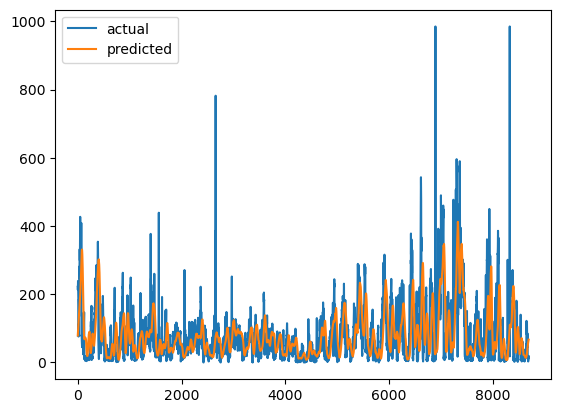

In [11]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_lstm, label='predicted')
plt.legend()
plt.show()
